In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [12]:
df = df[['Sorting Time','Delivery Time']]
df = df.rename(columns={'Sorting Time':'Sorting','Delivery Time':'Delivery'})
df

,Sorting,Delivery
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00
5,6,15.35
6,7,19.00
7,3,9.50
8,10,17.90
9,9,18.75


In [13]:
df.describe()

,Sorting,Delivery
count,21.000000,21.000000
mean,6.190476,16.790952
std,2.542028,5.074901
min,2.000000,8.000000
25%,4.000000,13.500000
50%,6.000000,17.830000
75%,8.000000,19.750000
max,10.000000,29.000000


# Data Visualisation

<AxesSubplot:xlabel='Sorting', ylabel='Density'>

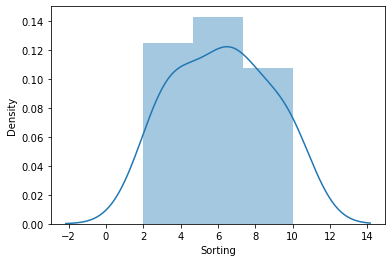

In [14]:
sns.distplot(df['Sorting'])

<AxesSubplot:xlabel='Delivery', ylabel='Density'>

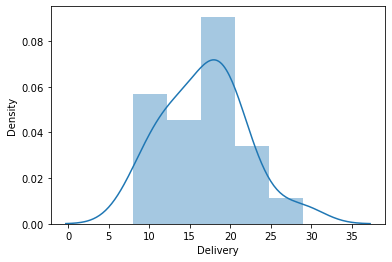

In [15]:
sns.distplot(df['Delivery'])

In [16]:
df['Delivery'].skew()

0.3523900822831107

In [17]:
df.corr()

,Sorting,Delivery
Sorting,1.000000,0.825997
Delivery,0.825997,1.000000


<AxesSubplot:>

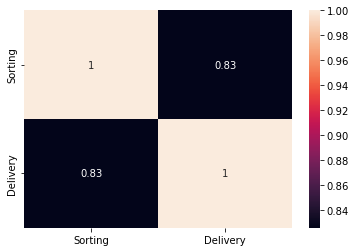

In [18]:
sns.heatmap(df.corr(),annot=True)

# Model Building

In [19]:
import statsmodels.formula.api as smf

In [20]:
model = smf.ols('Delivery~Sorting', data=df).fit()

In [21]:
# Model parameters
c, m = model.params.round(2)
c, m

(6.58, 1.65)

# Line Equation

In [22]:
x = 5
y = m * x + c 
y

14.83

## R2 Value

In [23]:
model.rsquared

0.6822714748417231

# Prediction For New Data

In [24]:
newdf = pd.Series([1,12,16,22,32])
newdf = pd.DataFrame(data=newdf, columns=['Sorting'])
newdf

,Sorting
0,1
1,12
2,16
3,22
4,32


In [25]:
newdf['Delivery'] = model.predict(newdf). round(2)
newdf

,Sorting,Delivery
0,1,8.23
1,12,26.37
2,16,32.97
3,22,42.86
4,32,59.35


# Data Transformation

In [26]:
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi'] = 200

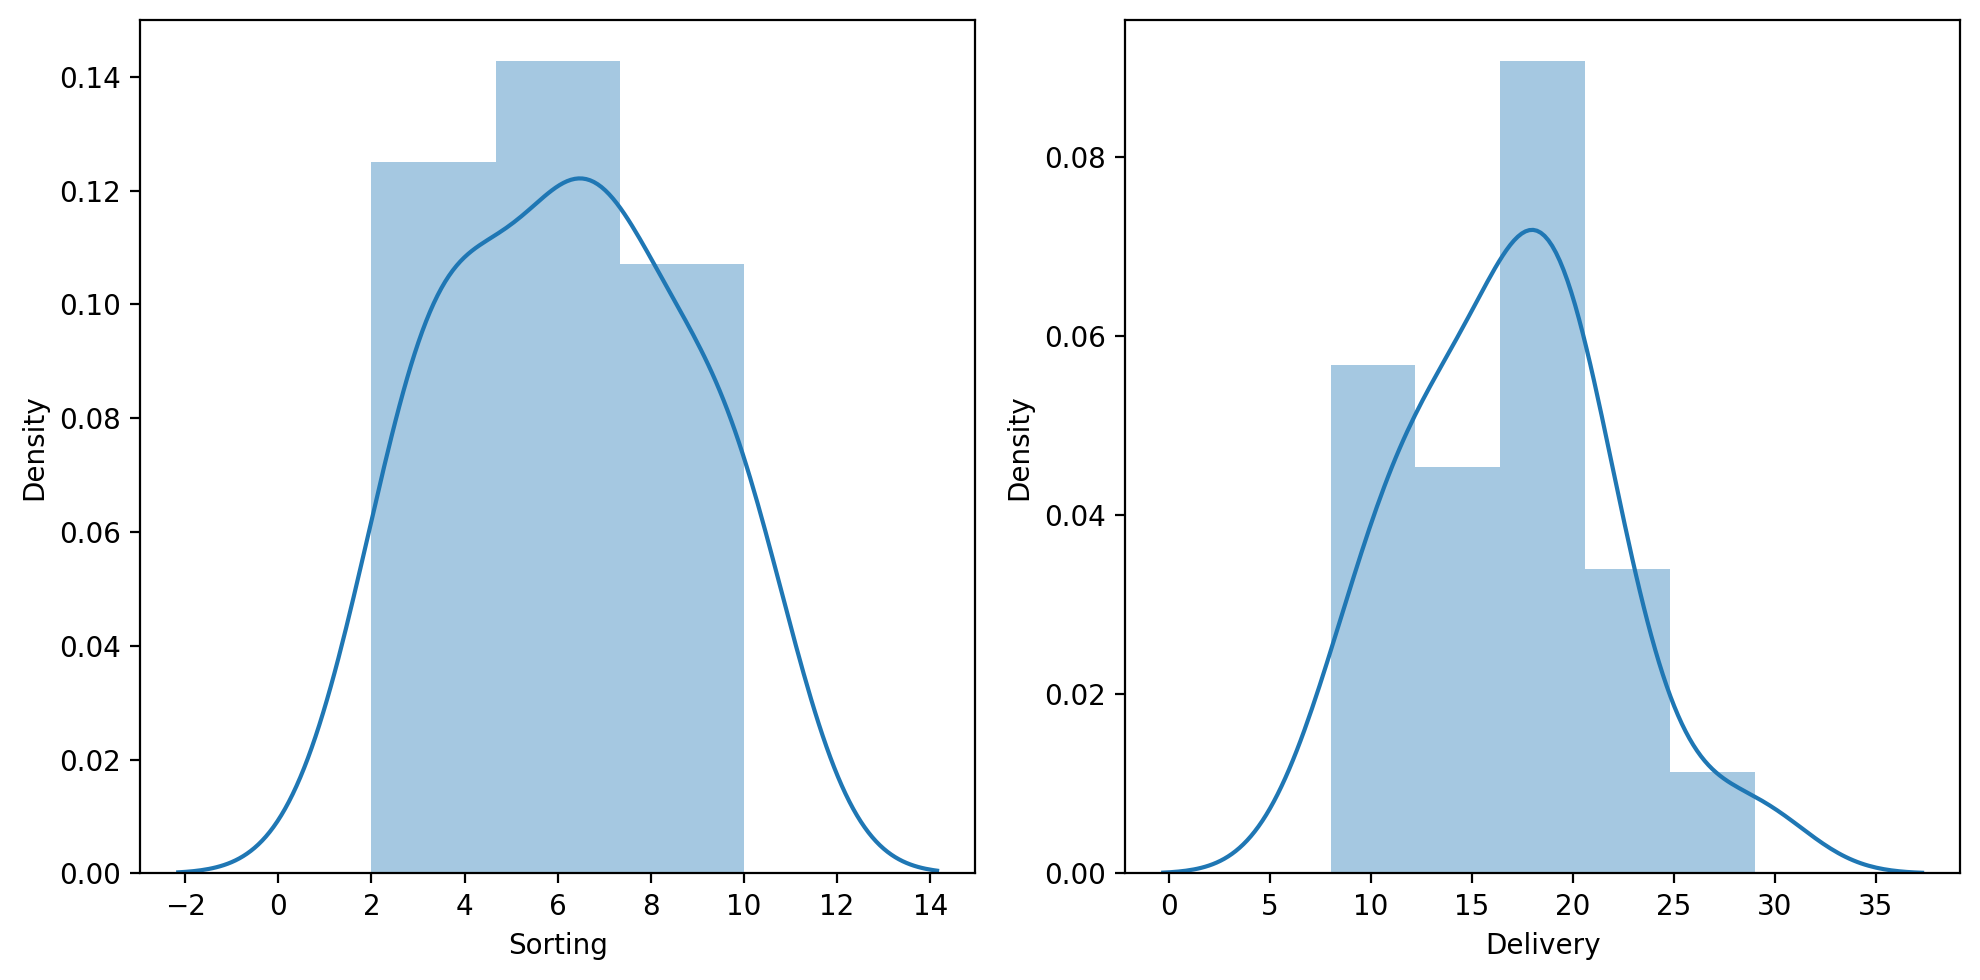

In [27]:
plt.subplot(1,2,1)
sns.distplot(df['Sorting'])

plt.subplot(1,2,2)
sns.distplot(df['Delivery'])
plt.tight_layout()

# Log Transformation

In [28]:
df['log_Sorting'] = np.log(df['Sorting'])
df['log_Delivery'] = np.log(df['Delivery'])
df.head()

,Sorting,Delivery,log_Sorting,log_Delivery
0,10,21.00,2.302585,3.044522
1,4,13.50,1.386294,2.602690
2,6,19.75,1.791759,2.983153
3,9,24.00,2.197225,3.178054
4,10,29.00,2.302585,3.367296


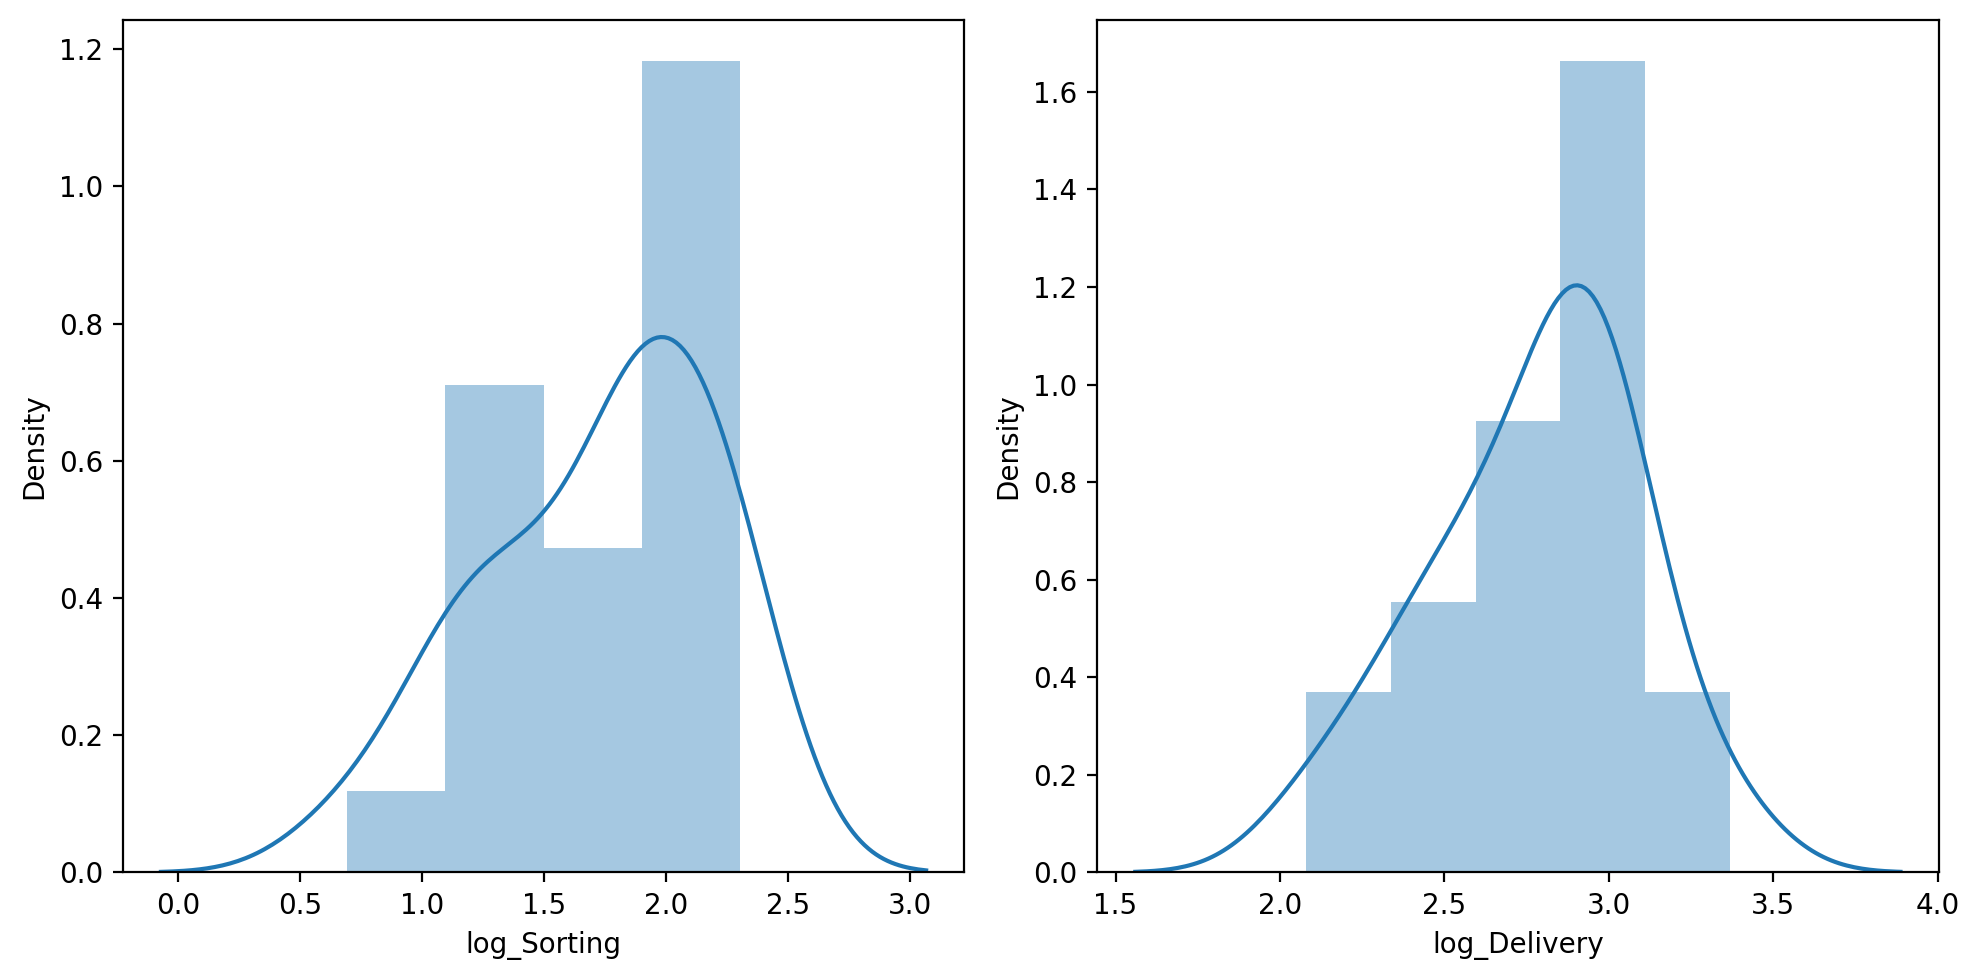

In [29]:
plt.subplot(1,2,1)
sns.distplot(df['log_Sorting'])

plt.subplot(1,2,2)
sns.distplot(df['log_Delivery'])
plt.tight_layout()

In [30]:
print(df['log_Sorting'].skew(), df['log_Delivery'].skew())

-0.6052357185134765 -0.4512901148522999


# Square-root Transformation

In [32]:
df['sqrt_Sorting'] = np.sqrt(df['Sorting'])
df['sqrt_Delivery'] = np.sqrt(df['Delivery'])
df.head()

,Sorting,Delivery,log_Sorting,log_Delivery,sqrt_Sorting,sqrt_Delivery
0,10,21.00,2.302585,3.044522,3.162278,4.582576
1,4,13.50,1.386294,2.602690,2.000000,3.674235
2,6,19.75,1.791759,2.983153,2.449490,4.444097
3,9,24.00,2.197225,3.178054,3.000000,4.898979
4,10,29.00,2.302585,3.367296,3.162278,5.385165


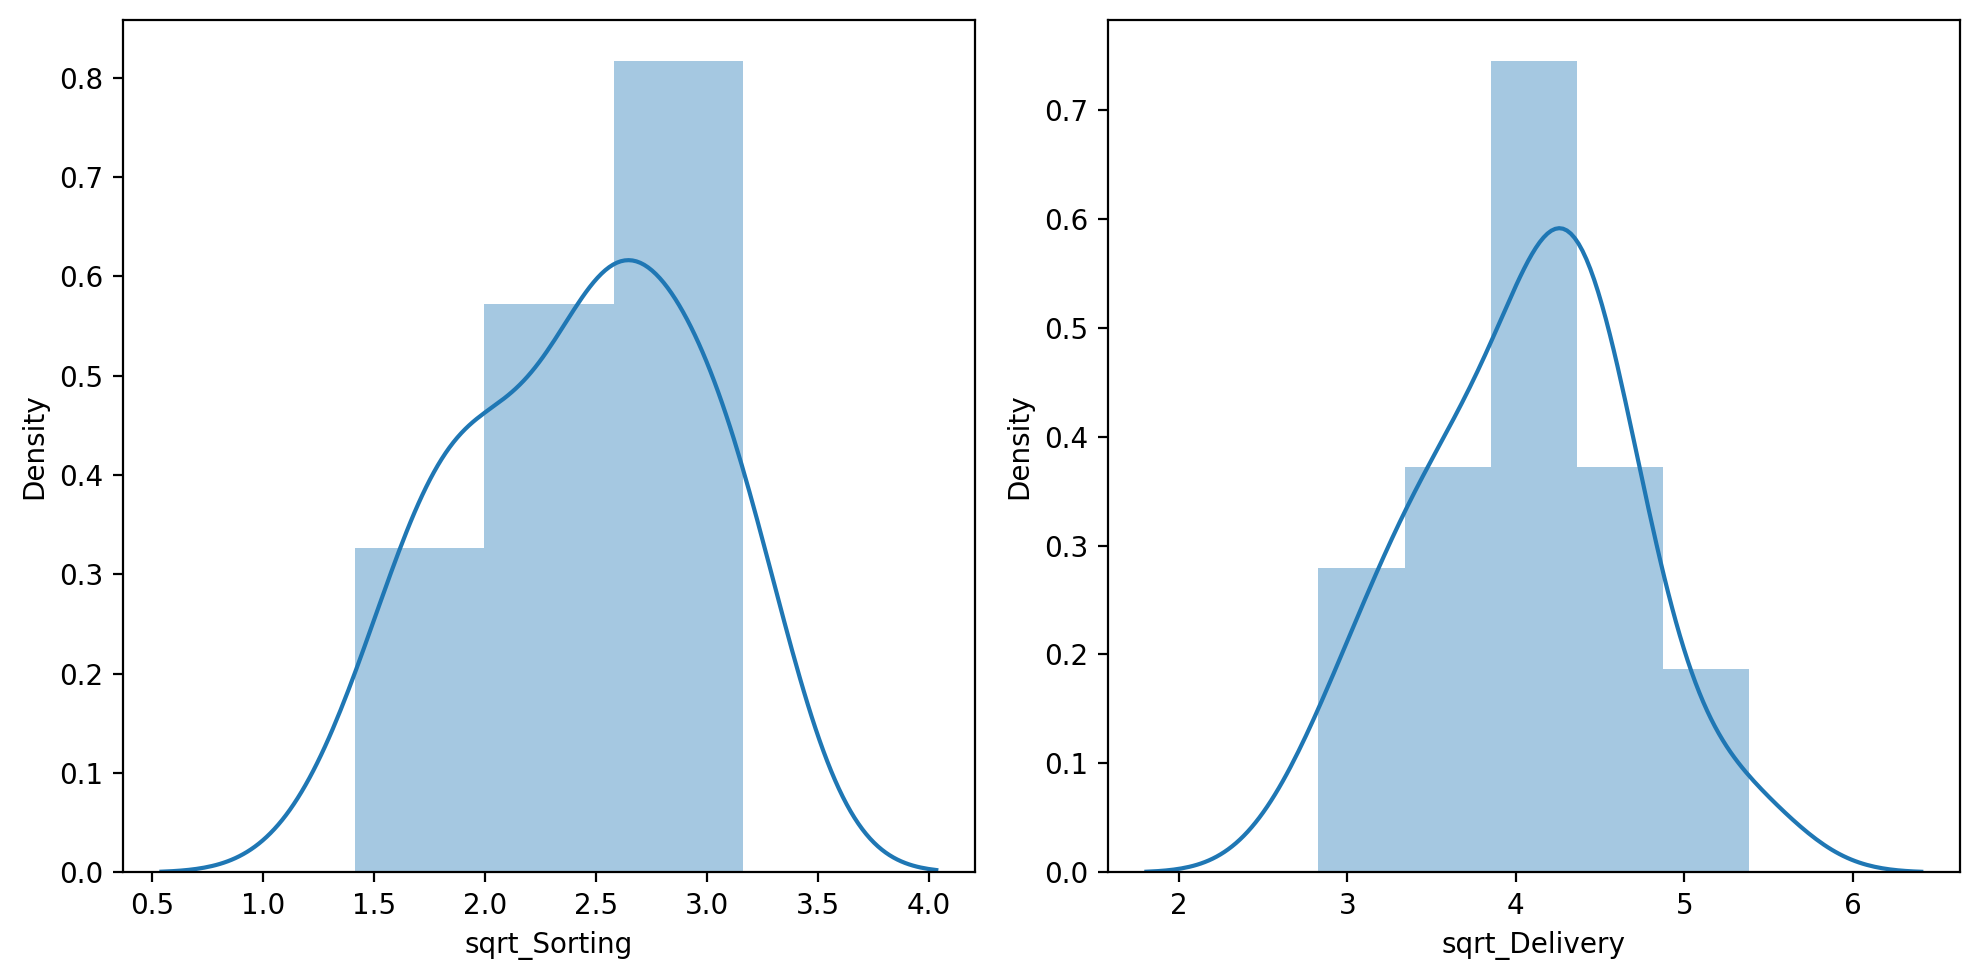

In [33]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_Sorting'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_Delivery'])
plt.tight_layout()

# Square Transformation

In [34]:
df['sq_Sorting'] = np.square(df['Sorting'])
df['sq_Delivery'] = np.square(df['Delivery'])
df.head()

,Sorting,Delivery,log_Sorting,log_Delivery,sqrt_Sorting,sqrt_Delivery,sq_Sorting,sq_Delivery
0,10,21.00,2.302585,3.044522,3.162278,4.582576,100,441.0000
1,4,13.50,1.386294,2.602690,2.000000,3.674235,16,182.2500
2,6,19.75,1.791759,2.983153,2.449490,4.444097,36,390.0625
3,9,24.00,2.197225,3.178054,3.000000,4.898979,81,576.0000
4,10,29.00,2.302585,3.367296,3.162278,5.385165,100,841.0000


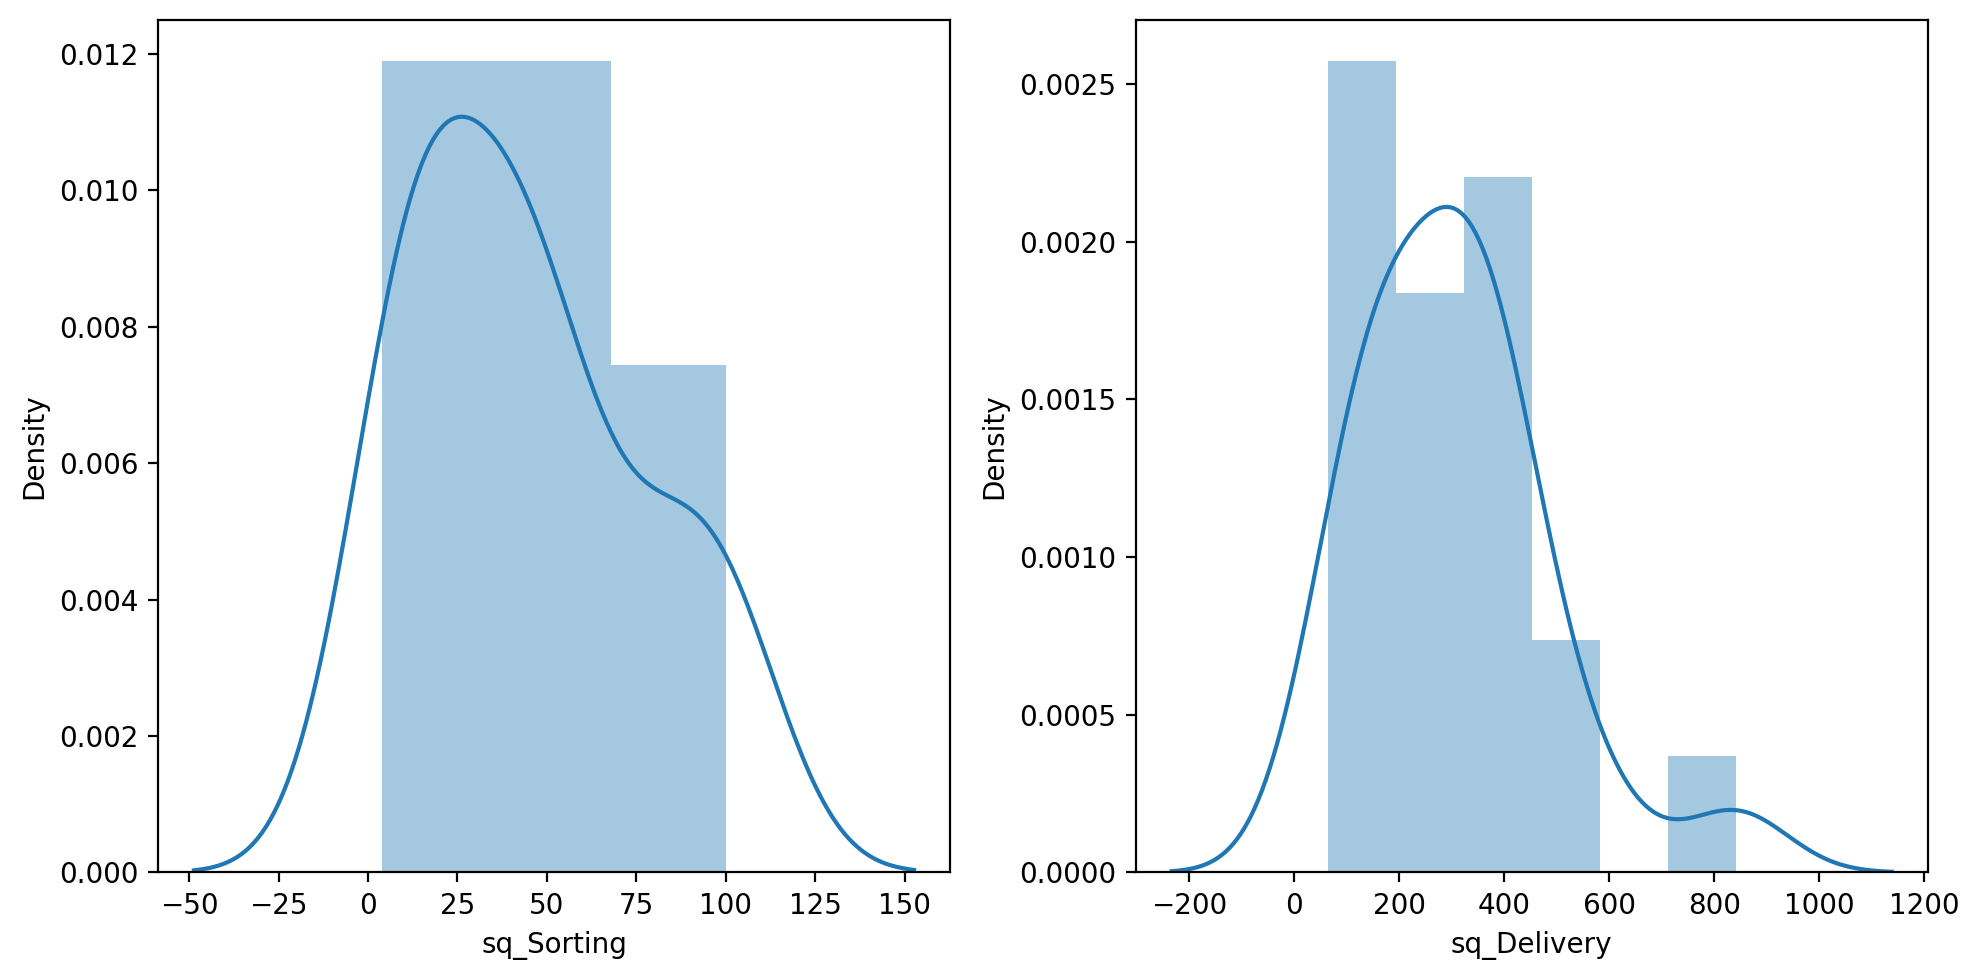

In [35]:
plt.subplot(1,2,1)
sns.distplot(df['sq_Sorting'])

plt.subplot(1,2,2)
sns.distplot(df['sq_Delivery'])
plt.tight_layout()

In [36]:
print(df['sq_Sorting'].skew(), df['sq_Delivery'].skew())

0.5594219654616026 1.2363588519529751
